# vendor_performance_Analysis


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [6]:
# Creating database connection
conn = sqlite3.connect('inventory.db')

# fetching vendor summary data
df = pd.read_sql_query('select * from vendor_sales_summary', conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,Gross Profit,Profit Margin,Stock_Turnover,Sales_to_Purchase_Ratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,9578.0,344712.22,64889.97,17598.14,68601.68,-3466539.38,-1005.632867,0.066019,0.090446
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,9203.0,275162.97,52289.50,16909.12,144929.24,-3528878.25,-1282.468440,0.056103,0.072334
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,11189.0,288135.11,48202.30,20557.97,123780.22,-3130168.57,-1086.354443,0.059704,0.084292
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,20226.0,444810.74,43304.31,37163.76,257032.07,-2816387.20,-633.165287,0.100287,0.136395
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,11883.0,357759.17,52774.51,21833.58,257032.07,-2665446.84,-745.039419,0.086041,0.118338


In [8]:
# Summary Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.0000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.5000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.8400,10.455000,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.9900,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.0000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.0000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.4575,3655.465000,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,2.288879e+02,871.127723,0.00,0.0000,12.000000,129.250000,2.854400e+04
TotalSalesDollars,10692.0,3.089648e+03,12181.138259,0.00,0.0000,251.740000,2089.552500,4.448107e+05
TotalSalesPrice,10692.0,1.508301e+03,3902.425486,0.00,0.0000,125.980000,1220.622500,6.488997e+04


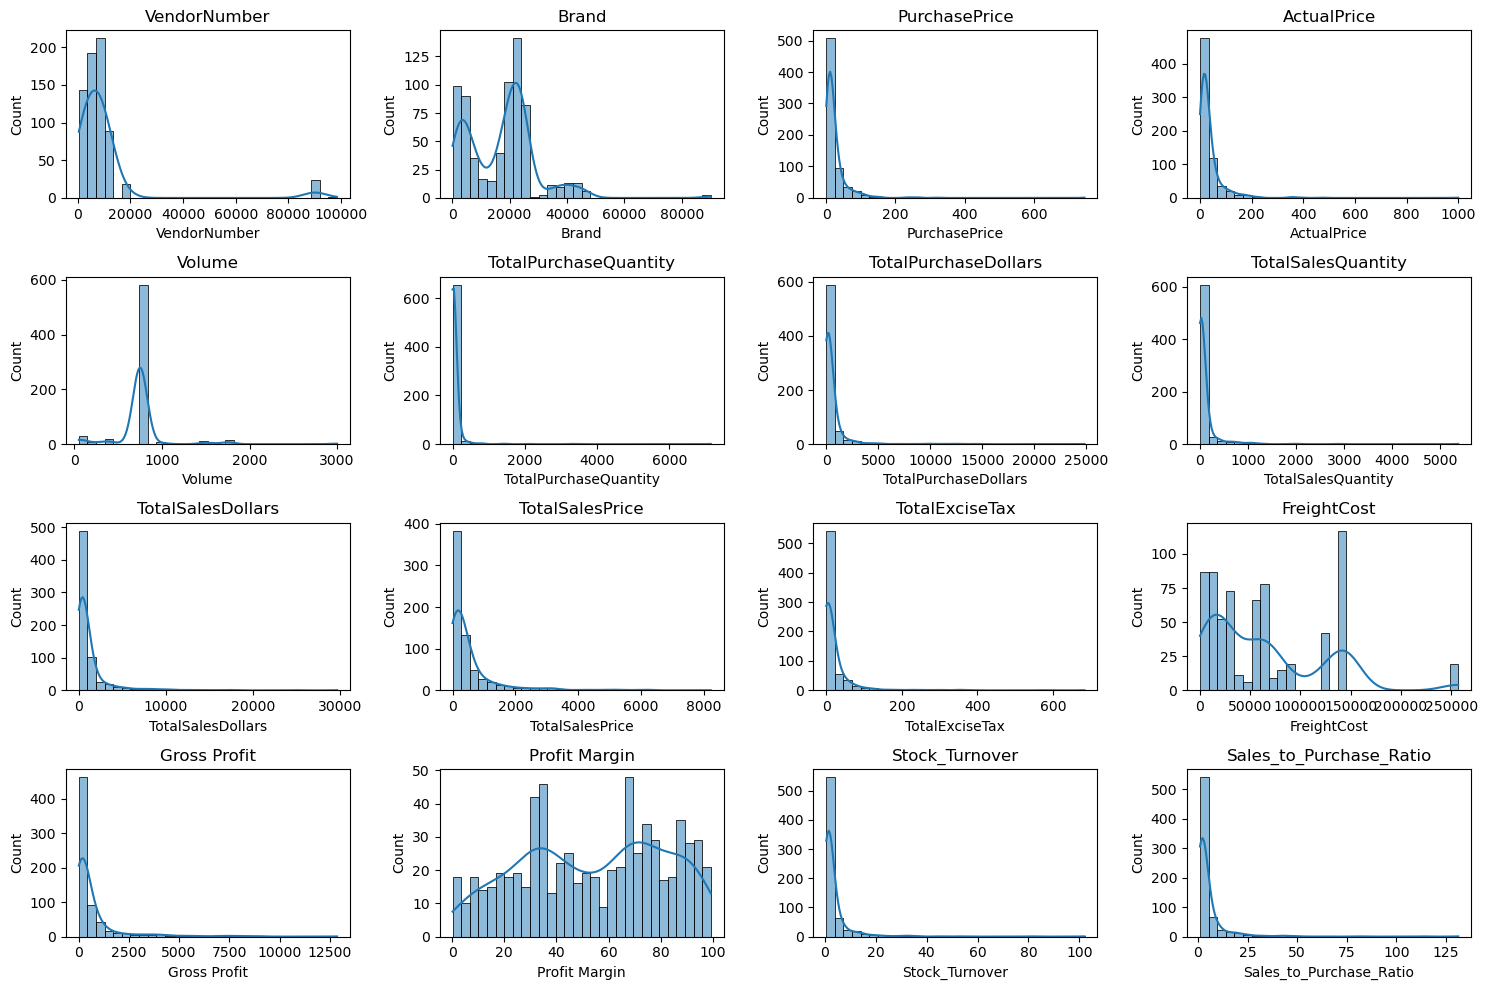

In [19]:
# Distribution Plots for Numerical columns
numerical_cols = df.select_dtypes(include = np.number).columns

plt.figure(figsize = (15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i+1) # Adjusting grid layout as needed
    sns.histplot(df[col], kde = True, bins = 30)
    plt.title(col)
plt.tight_layout()
plt.show()

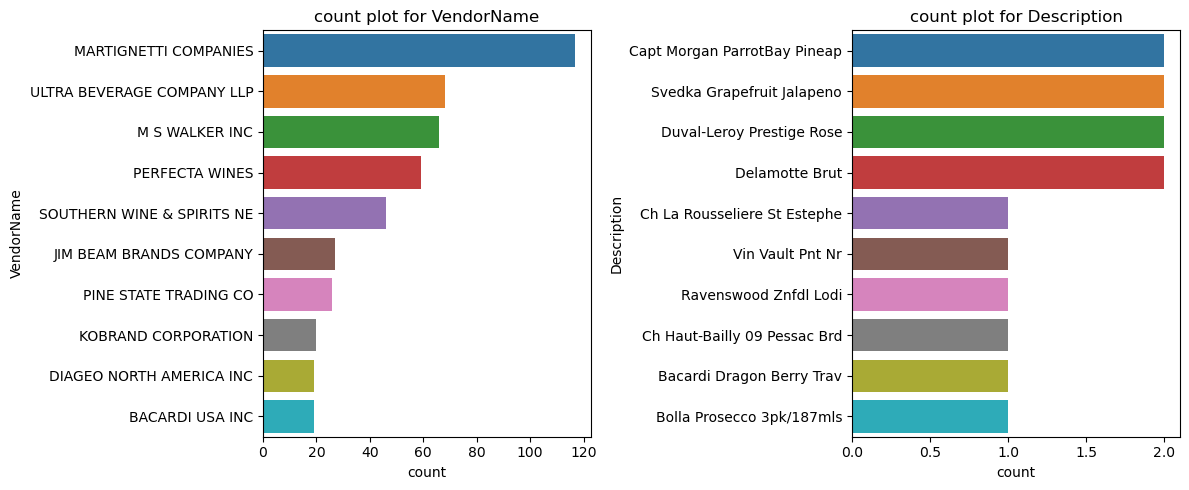

In [23]:
# Count plots for categorical columns

categorical_cols = ['VendorName','Description']

plt.figure(figsize = (12,5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1) 
    sns.countplot(y = df[col], order = df[col].value_counts().index[:10]) # top 10 categories
    plt.title(f"count plot for {col}")
plt.tight_layout()
plt.show()

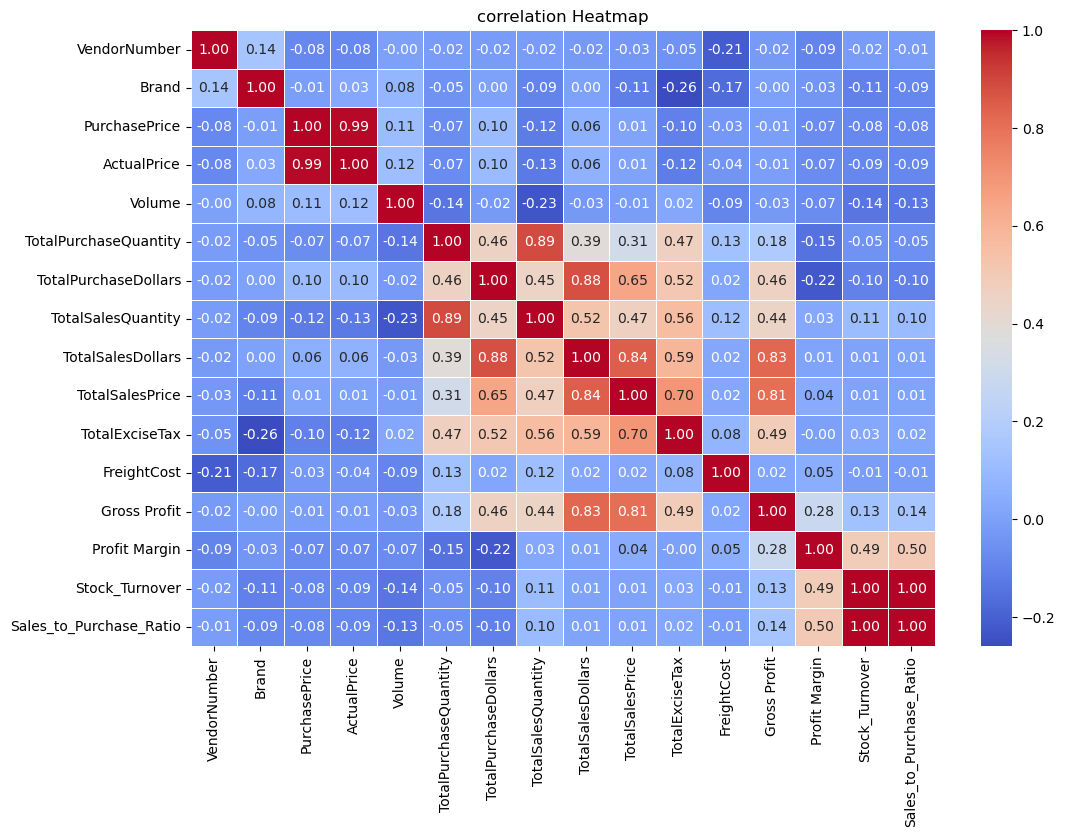

In [25]:
# correlation Heatmap

plt.figure(figsize=(12,8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot = True, fmt=".2f", cmap = "coolwarm", linewidth = 0.5)
plt.title("correlation Heatmap")
plt.show()

### Identify Brands thats needs Promotional and pricing adjustments which exhibits low sales performance but higher profit margin

In [27]:
Brand_performance = df.groupby('Description').agg({'TotalSalesDollars': 'sum',
                              'Profit Margin': 'mean'}).reset_index()

In [29]:
low_sales_threshold = Brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = Brand_performance['Profit Margin'].quantile(0.85)

In [30]:
low_sales_threshold

119.832

In [31]:
high_margin_threshold

87.42082785501475

In [33]:
# filter brands with low sales but high profit margin

target_brands = Brand_performance[
    (Brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (Brand_performance['Profit Margin'] >= high_margin_threshold)
]
print("Brands with low sales but high profit margin : ")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low sales but high profit margin : 


,Description,TotalSalesDollars,Profit Margin
616,The Club Strawbry Margarita,11.94,87.688442
229,Crown Royal Apple,23.88,88.107203
635,Tracia Syrah,44.94,88.495772
46,Bacardi Oakheart Spiced Trav,59.94,87.554221
256,Dr McGillicuddy's Apple Pie,62.72,96.269133
579,St Elder Elderflower Liqueur,66.33,91.436756
31,Aresti Pnt Nr Curico Vly,74.85,95.617902
239,DeKuyper Buttershots Trav,76.93,90.718835
626,Three Olives Grape Vodka,80.19,99.114603
580,St Germain Liqueur,89.94,87.658439


In [38]:
Brand_performance = Brand_performance[Brand_performance['TotalSalesDollars']<10000] # for better visualization

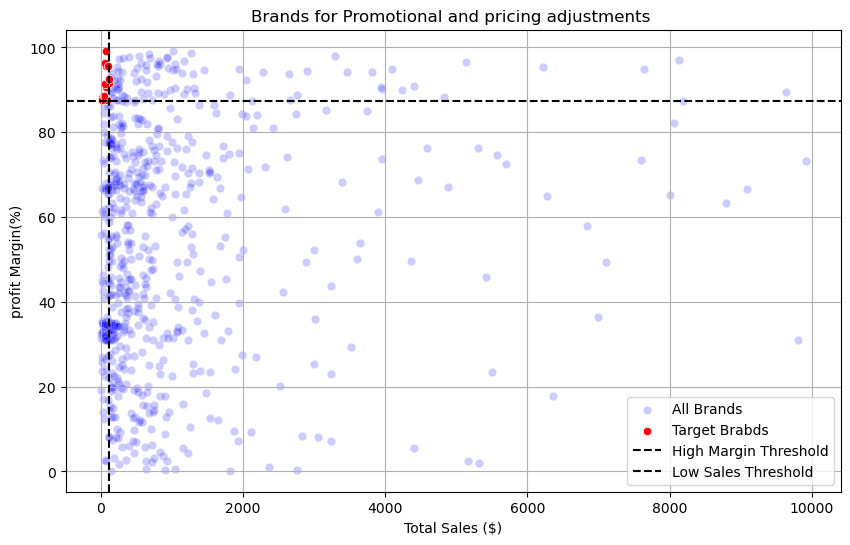

In [39]:
plt.figure(figsize = (10,6))
sns.scatterplot(data = Brand_performance, x = 'TotalSalesDollars', y = 'Profit Margin', color = 'blue', label = 'All Brands', alpha = 0.2)
sns.scatterplot(data = target_brands, x = 'TotalSalesDollars', y = 'Profit Margin', color = 'red', label = 'Target Brabds')

plt.axhline(high_margin_threshold, linestyle='--', color = 'black', label = 'High Margin Threshold')
plt.axvline(low_sales_threshold, linestyle='--', color = 'black', label = 'Low Sales Threshold')

plt.xlabel('Total Sales ($)')
plt.ylabel('profit Margin(%)')
plt.title('Brands for Promotional and pricing adjustments ')
plt.legend()
plt.grid(True)
plt.show()

### Vendor and Brands demonstrate highest sales performance

In [45]:
def format_dollars(value):
    if value >= 1_000_000:
        return f"{value/1_000_000:.2f}M"
    elif value >= 1_000:
        return f"{value/1_000:.2f}K"
    else:
        return str(value)

In [46]:
# top vendor and brands by sales performance
top_vendors = df.groupby('VendorName')['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby('Description')['TotalSalesDollars'].sum().nlargest(10)
top_vendors

VendorName
ULTRA BEVERAGE COMPANY LLP    132226.54
MARTIGNETTI COMPANIES         125884.74
M S WALKER INC                100939.71
PERFECTA WINES                 62686.86
BACARDI USA INC                49095.12
SOUTHERN WINE & SPIRITS NE     48248.55
STATE WINE & SPIRITS           30773.64
JIM BEAM BRANDS COMPANY        28761.34
DIAGEO NORTH AMERICA INC       22506.09
BROWN-FORMAN CORP              20504.19
Name: TotalSalesDollars, dtype: float64

In [47]:
top_brands

Description
Ch La Rousseliere St Estephe    29698.02
Madison's Ranch Cab Svgn        24797.91
Bacardi Twin Pack 2/750mls      17331.33
Paul Dolan 12 Cab Svgn          17253.49
DiSaronna Amaretto Sour VAP     15596.83
Pizzolato Pnt Grigio            14252.61
Robert Hall Cab Svgn            12912.77
Latour 12 Cuvee Bourg Rouge     12273.86
Bacardi Superior Rum            11411.40
Saddleback Clrs 09 Cab Svgn     10447.25
Name: TotalSalesDollars, dtype: float64

In [49]:
top_brands.apply(lambda x : format_dollars(x))

Description
Ch La Rousseliere St Estephe    29.70K
Madison's Ranch Cab Svgn        24.80K
Bacardi Twin Pack 2/750mls      17.33K
Paul Dolan 12 Cab Svgn          17.25K
DiSaronna Amaretto Sour VAP     15.60K
Pizzolato Pnt Grigio            14.25K
Robert Hall Cab Svgn            12.91K
Latour 12 Cuvee Bourg Rouge     12.27K
Bacardi Superior Rum            11.41K
Saddleback Clrs 09 Cab Svgn     10.45K
Name: TotalSalesDollars, dtype: object

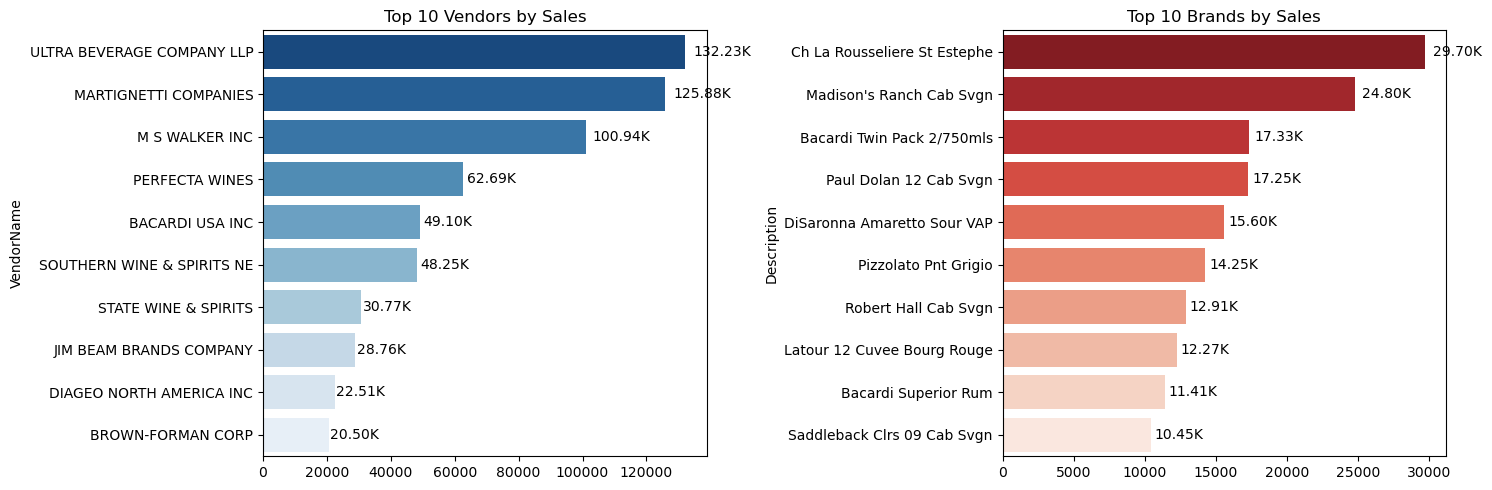

In [50]:
plt.figure(figsize=(15, 5))

# Plot for Top Vendors

plt.subplot(1, 2, 1)
ax1 = sns.barplot(y=top_vendors.index, x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 Vendors by Sales")

# Add data labels
for bar in ax1.patches:
    ax1.text(
        bar.get_width() + (bar.get_width() * 0.02),  # slight offset to the right
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),             # custom formatting function
        ha='left', va='center', fontsize=10, color='black'
    )


# Plot for Top Brands

plt.subplot(1, 2, 2)
ax2 = sns.barplot(y=top_brands.index.astype(str), x=top_brands.values, palette="Reds_r")
plt.title("Top 10 Brands by Sales")

# Add data labels
for bar in ax2.patches:
    ax2.text(
        bar.get_width() + (bar.get_width() * 0.02),
        bar.get_y() + bar.get_height() / 2,
        format_dollars(bar.get_width()),
        ha='left', va='center', fontsize=10, color='black'
    )

plt.tight_layout()
plt.show()

### vendors that contribute the most to total purchase dollars

In [54]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'Gross Profit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [69]:
vendor_performance['PurchaseContribution']=vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [73]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution', ascending = False),2)

In [74]:
# Get top 10 vendors
top_vendors = vendor_performance.head(10)

# Format currency columns
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['Gross Profit'] = top_vendors['Gross Profit'].apply(format_dollars)

top_vendors

,VendorName,TotalPurchaseDollars,Gross Profit,TotalSalesDollars,PurchaseContribution
56,ULTRA BEVERAGE COMPANY LLP,51.49K,80.73K,132.23K,13.54
30,MARTIGNETTI COMPANIES,49.36K,76.53K,125.88K,12.97
28,M S WALKER INC,48.47K,52.47K,100.94K,12.74
37,PERFECTA WINES,40.43K,22.26K,62.69K,10.63
2,BACARDI USA INC,28.83K,20.27K,49.10K,7.58
47,SOUTHERN WINE & SPIRITS NE,20.94K,27.30K,48.25K,5.51
24,JIM BEAM BRANDS COMPANY,14.29K,14.47K,28.76K,3.76
13,DIAGEO NORTH AMERICA INC,14.02K,8.49K,22.51K,3.69
48,STATE WINE & SPIRITS,11.70K,19.07K,30.77K,3.08
38,PERNOD RICARD USA,10.76K,9.57K,20.33K,2.83


In [80]:
top_vendors['cumulative_contribution'] = top_vendors['PurchaseContribution'].cumsum()
top_vendors

,VendorName,TotalPurchaseDollars,Gross Profit,TotalSalesDollars,PurchaseContribution,cumulative_contribution
56,ULTRA BEVERAGE COMPANY LLP,51.49K,80.73K,132.23K,13.54,13.54
30,MARTIGNETTI COMPANIES,49.36K,76.53K,125.88K,12.97,26.51
28,M S WALKER INC,48.47K,52.47K,100.94K,12.74,39.25
37,PERFECTA WINES,40.43K,22.26K,62.69K,10.63,49.88
2,BACARDI USA INC,28.83K,20.27K,49.10K,7.58,57.46
47,SOUTHERN WINE & SPIRITS NE,20.94K,27.30K,48.25K,5.51,62.97
24,JIM BEAM BRANDS COMPANY,14.29K,14.47K,28.76K,3.76,66.73
13,DIAGEO NORTH AMERICA INC,14.02K,8.49K,22.51K,3.69,70.42
48,STATE WINE & SPIRITS,11.70K,19.07K,30.77K,3.08,73.50
38,PERNOD RICARD USA,10.76K,9.57K,20.33K,2.83,76.33


In [79]:
top_vendors = top_vendors.drop('cummulative_contribution', axis=1)


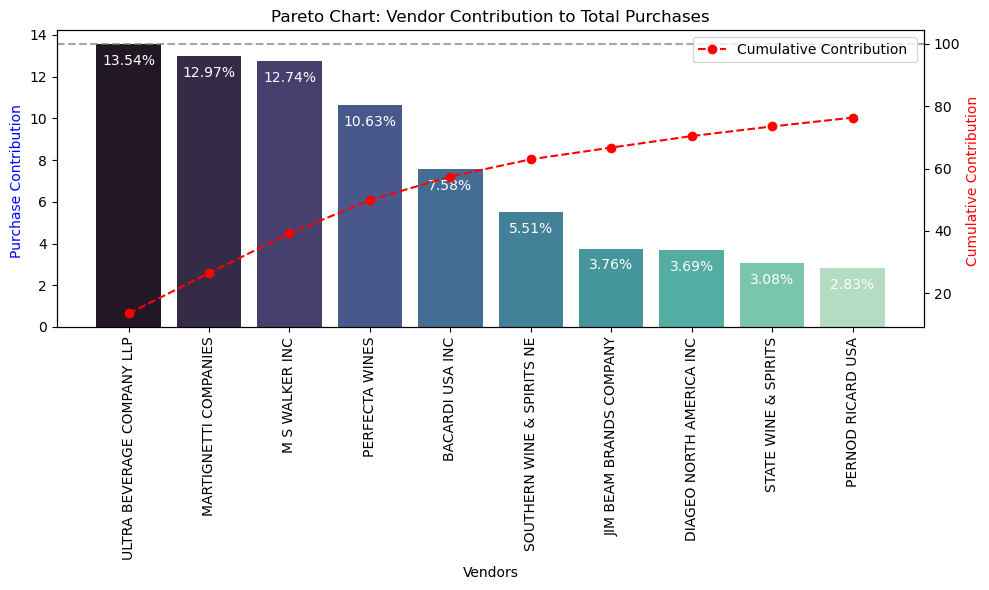

In [81]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar Plot for Purchase Contribution 

sns.barplot(
    x=top_vendors['VendorName'], 
    y=top_vendors['PurchaseContribution'], 
    palette="mako", 
    ax=ax1
)

# Add labels to each bar
for i, value in enumerate(top_vendors['PurchaseContribution']):
    ax1.text(i, value - 1, str(value) + '%', ha='center', fontsize=10, color='white')


# Line Plot for Cumulative Contribution 

ax2 = ax1.twinx()
ax2.plot(
    top_vendors['VendorName'], 
    top_vendors['cumulative_contribution'], 
    color='red', 
    marker='o', 
    linestyle='dashed', 
    label='Cumulative Contribution '
)

# Axis labels and ticks
ax1.set_xticklabels(top_vendors['VendorName'], rotation=90)
ax1.set_ylabel('Purchase Contribution ', color='blue')
ax2.set_ylabel('Cumulative Contribution ', color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

# Horizontal line at 100% mark
ax2.axhline(y=100, color='gray', linestyle='dashed', alpha=0.7)
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

### Total Procurement is dependent on the top vendors 

In [83]:
print(f"Total Purchase contribution of Top 10 vendors is {round(top_vendors['PurchaseContribution'].sum(),2)}%")

Total Purchase contribution of Top 10 vendors is 76.33%


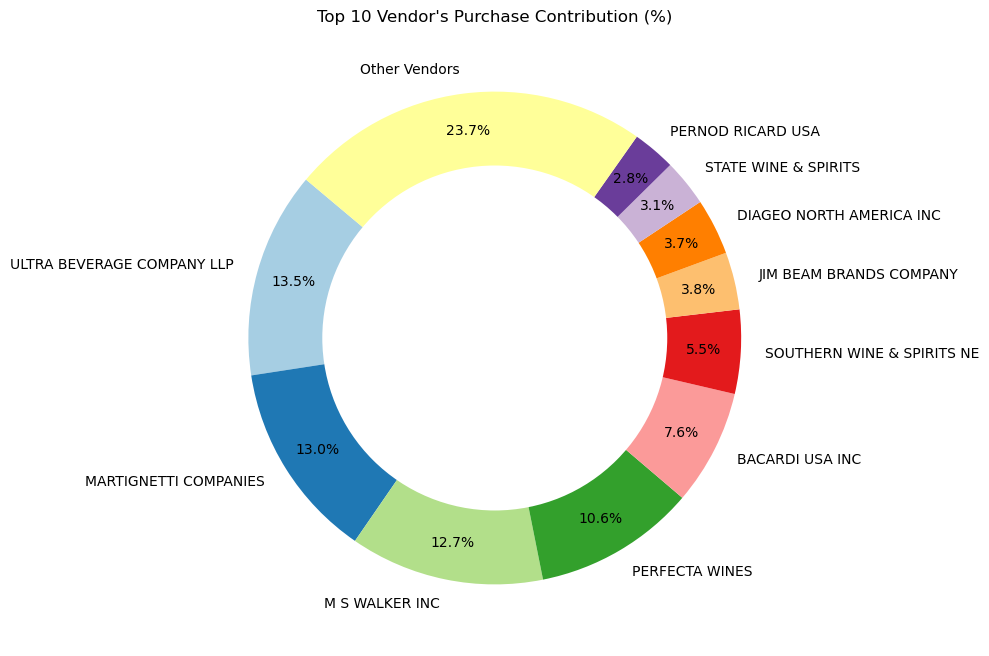

In [84]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(
    purchase_contributions,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    pctdistance=0.85,
    colors=plt.cm.Paired.colors
)

# Draw a white circle in the center to create a "donut" effect
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)

# Add Total Contribution annotation in the center
plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()


#### Does Purchasing in bulk reduce the unit price and optimal purchase volume for cost savings 

In [85]:
df['UnitPurchasePrice']= df['TotalPurchaseDollars']/ df['TotalPurchaseQuantity']

In [87]:
df['OrderSize']= pd.qcut(df['TotalPurchaseQuantity'],q=3, labels =['Small', 'Medium', 'Large'])

In [91]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,36.700159
Medium,22.570569
Large,11.932248


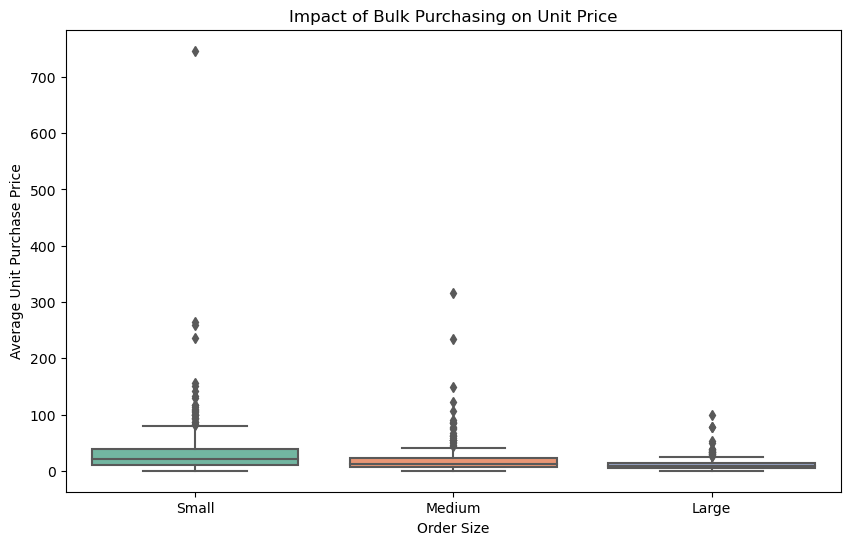

In [92]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="OrderSize", y="UnitPurchasePrice", palette="Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

### vendor have low inventory turnover, indicating excess stock low moving products 

In [97]:
df[df['Stock_Turnover']<1].groupby('VendorName')[['Stock_Turnover']].mean().sort_values('Stock_Turnover', ascending = True).head(10)

,Stock_Turnover
VendorName,
BANFI PRODUCTS CORP,0.650000
HEAVEN HILL DISTILLERIES,0.660000
SURVILLE ENTERPRISES CORP,0.666667
WILLIAM GRANT & SONS INC,0.695652
STATE WINE & SPIRITS,0.707093
VINEXTRA INC,0.716981
SOUTHERN WINE & SPIRITS NE,0.729167
TREASURY WINE ESTATES,0.745798
E & J GALLO WINERY,0.746296


### how much capital is locked in unsold inventory per vendor and which vendors contribute the most of it 

In [98]:
df['UnsoldInventoryValue']=(df['TotalPurchaseQuantity']-df['TotalSalesQuantity']) * df['PurchasePrice']
print('TotalUnsoldCapital : ', format_dollars(df['UnsoldInventoryValue'].sum()))

TotalUnsoldCapital :  -192691.53


In [99]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with the Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by="UnsoldInventoryValue", ascending=False)
inventory_value_per_vendor["UnsoldInventoryValue"] = inventory_value_per_vendor["UnsoldInventoryValue"].apply(format_dollars)

inventory_value_per_vendor.head(10)


,VendorName,UnsoldInventoryValue
54,TREASURY WINE ESTATES,339.94
51,SURVILLE ENTERPRISES CORP,240.72
3,BANFI PRODUCTS CORP,205.41000000000003
35,NICHE W & S,202.94
1,ATLANTIC IMPORTING COMPANY,124.08
57,VINEXTRA INC,112.2
40,POVERTY LANE ORCHARDS,87.41999999999999
16,Dunn Wine Brokers,77.88
53,THE IMPORTED GRAPE LLC,74.48
62,WILLIAM GRANT & SONS INC,34.719999999999985


### what is 95% confidence intervals for profit margins of top performing and low performing vendors 

In [101]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [103]:
top_vendors = df[df['TotalSalesDollars']>= top_threshold]['Profit Margin'].dropna()
low_vendors = df[df['TotalSalesDollars']<= low_threshold]['Profit Margin'].dropna()

In [106]:
def confidence_interval(data, confidence=0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof=1) / np.sqrt(len(data))  # Standard error
    t_critical = stats.t.ppf((1 + confidence) / 2, df=len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error


Top Vendors 95% CI: (52.73, 61.42), Mean: 57.08
Low Vendors 95% CI: (46.83, 54.49), Mean: 50.66


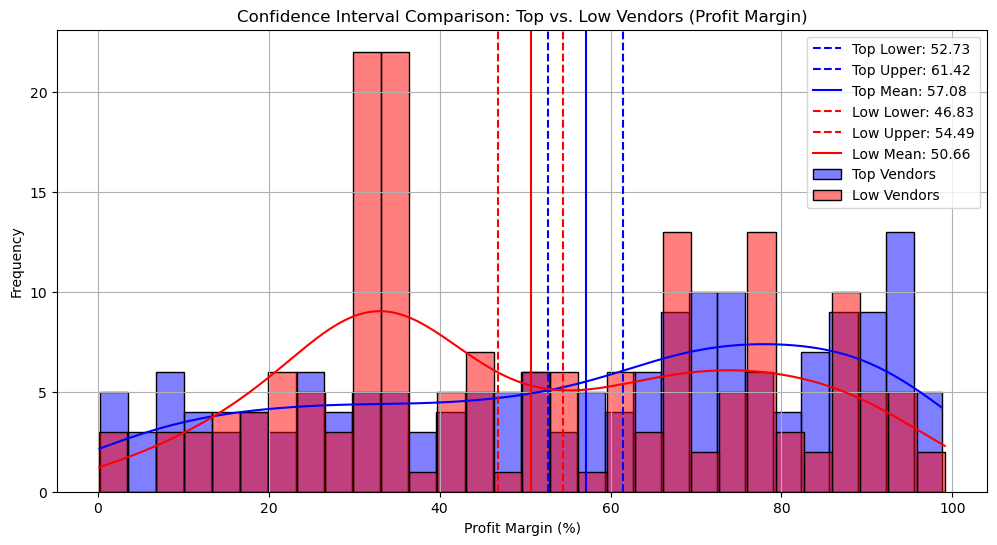

In [108]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize=(12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde=True, color="blue", bins=30, alpha=0.5, label="Top Vendors")
plt.axvline(top_lower, color="blue", linestyle="--", label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color="blue", linestyle="--", label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean, color="blue", linestyle="-", label=f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde=True, color="red", bins=30, alpha=0.5, label="Low Vendors")
plt.axvline(low_lower, color="red", linestyle="--", label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color="red", linestyle="--", label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean, color="red", linestyle="-", label=f"Low Mean: {low_mean:.2f}")

# Finalize Plot
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

In [109]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["Profit Margin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["Profit Margin"].dropna()

# Perform Two-Sample T-Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var=False)

# Print results
print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject H₀: No significant difference in profit margins.")


T-Statistic: 2.1882, P-Value: 0.0293
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.


In [111]:
# Create labeled DataFrame
top_labeled = pd.DataFrame({'ProfitMargin': top_vendors, 'VendorType': 'Top'})
low_labeled = pd.DataFrame({'ProfitMargin': low_vendors, 'VendorType': 'Low'})

# Combine and save
combined_df = pd.concat([top_labeled, low_labeled], ignore_index=True)
combined_df.to_csv("vendor_profit_margins_labeled.csv", index=False)


In [112]:
df.to_csv("final_vendor_file.csv",index=False)